In [585]:
import numpy as np 
import matplotlib.pyplot as plt

In [586]:
def g_h_filter(data, x0, dx, g, h, dt):

    estimates = [] #List to store estimates
    xest = x0
    for z in data: 
        x_pred = x0 + dx * dt 

        residual = z - x_pred 
        dx = dx + h*residual/dt
        xest = x_pred + g*residual
        estimates.append(xest)
    return np.array(estimates)


White noise can be generated by numpy.random.randn(). We want a function that we call with the starting value, the amount of change per step, the number of steps, and the amount of noise we want to add. It should return a list of the data. Test it by creating 30 points, filtering it with g_h_filter(), and plot the results with plot_g_h_results().

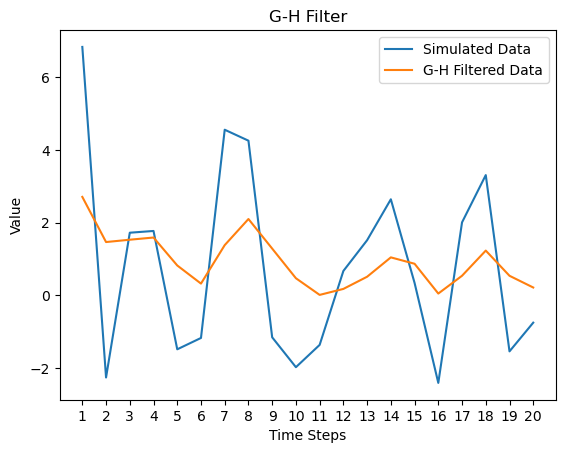

Avg step Slope: -0.40
Sim1 Slope:-0.3796346780081287


In [685]:
randslope = np.random.choice([0])
steps = 20 
# x0 starting value 
# dx predicted slope
# g weighting for residual (higher = more weight) *actual - predicted* (assignes more weight for each realized measurement)
# h weighting for slope (higher = more weight) *h*residual/dt* (assignes more weight for the realized slope change)
def g_h_filter(data, x0, dx, g, h, dt):
  
    estimates = [] #List to store estimates
    xest = x0
    for z in data: 
        x_pred = x0 + dx * dt 

        residual = z - x_pred 
        dx = dx + h*residual/dt
        xest = x_pred + g*residual
        estimates.append(xest)
    return np.array(estimates)
def simulate_data(sim1_k0,sim1_slope,steps,sim1_noise):
    sim1 = []
    for i in range(steps):
        noise = np.random.randn()*sim1_noise
        x = (i * sim1_slope) + sim1_k0 + noise
        sim1.append(x)
    return np.array(sim1)

dat = simulate_data(0,randslope,steps,2)

plt.plot(np.arange(1,steps+1,1),dat, label='Simulated Data')
plt.plot(np.arange(1,steps+1,1),g_h_filter(dat,1,0.3333,0.25,0.25,1), label='G-H Filtered Data')
plt.title('G-H Filter')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.xticks(np.arange(1, steps+1, 1))

plt.show()

print("Avg step Slope: {:.2f}".format((dat[steps-1] - dat[0]) / (steps - 1)))
print("Sim1 Slope:" + str(((dat[steps-1]-dat[0])/(steps))))